### Importing important lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from io import BytesIO
import os

### Load Dataset

In [2]:
df = pd.read_csv("train(1)(train(1)).csv")
df = df.drop(["id","zipcode"],axis=1)

In [4]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [3]:
df_val=pd.read_csv("test2(test(1)).csv")
df_val = df_val.drop(["zipcode"],axis=1)

In [5]:
df_val.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
df.shape

(16209, 19)

In [9]:
df_val.shape

(5404, 19)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           16209 non-null  object 
 1   price          16209 non-null  int64  
 2   bedrooms       16209 non-null  int64  
 3   bathrooms      16209 non-null  float64
 4   sqft_living    16209 non-null  int64  
 5   sqft_lot       16209 non-null  int64  
 6   floors         16209 non-null  float64
 7   waterfront     16209 non-null  int64  
 8   view           16209 non-null  int64  
 9   condition      16209 non-null  int64  
 10  grade          16209 non-null  int64  
 11  sqft_above     16209 non-null  int64  
 12  sqft_basement  16209 non-null  int64  
 13  yr_built       16209 non-null  int64  
 14  yr_renovated   16209 non-null  int64  
 15  lat            16209 non-null  float64
 16  long           16209 non-null  float64
 17  sqft_living15  16209 non-null  int64  
 18  sqft_l

In [11]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5404 entries, 0 to 5403
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5404 non-null   int64  
 1   date           5404 non-null   object 
 2   bedrooms       5404 non-null   int64  
 3   bathrooms      5404 non-null   float64
 4   sqft_living    5404 non-null   int64  
 5   sqft_lot       5404 non-null   int64  
 6   floors         5404 non-null   float64
 7   waterfront     5404 non-null   int64  
 8   view           5404 non-null   int64  
 9   condition      5404 non-null   int64  
 10  grade          5404 non-null   int64  
 11  sqft_above     5404 non-null   int64  
 12  sqft_basement  5404 non-null   int64  
 13  yr_built       5404 non-null   int64  
 14  yr_renovated   5404 non-null   int64  
 15  lat            5404 non-null   float64
 16  long           5404 non-null   float64
 17  sqft_living15  5404 non-null   int64  
 18  sqft_lot

In [15]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,3,7,1810,0,1961,0,47.4362,-122.187,1660,9240
1,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,4,7,1600,0,1992,0,47.4034,-122.187,1720,3605
2,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,3,8,1720,0,1994,0,47.2704,-122.313,1870,7455
3,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,3,7,1150,90,2009,0,47.5321,-122.073,1240,750
4,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,3,7,1280,0,1994,0,47.3715,-122.074,1590,8071


### Check For Nan values

In [12]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
df_val.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [17]:
df.nunique()

date              366
price            3428
bedrooms           12
bathrooms          29
sqft_living       881
sqft_lot         8048
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        803
sqft_basement     280
yr_built          116
yr_renovated       69
lat              4775
long              708
sqft_living15     692
sqft_lot15       7279
dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,16209.0,537470.282744,360303.577357,75000.0000,320000.0000,450000.0000,640000.0000,7.700000e+06
bedrooms,16209.0,3.367820,0.933270,0.0000,3.0000,3.0000,4.0000,3.300000e+01
bathrooms,16209.0,2.113054,0.765242,0.0000,1.5000,2.2500,2.5000,8.000000e+00
sqft_living,16209.0,2073.274601,907.009491,290.0000,1430.0000,1910.0000,2550.0000,1.205000e+04
sqft_lot,16209.0,14867.673145,38825.702074,520.0000,5004.0000,7599.0000,10631.0000,1.164794e+06
floors,16209.0,1.498828,0.543032,1.0000,1.0000,1.5000,2.0000,3.500000e+00
waterfront,16209.0,0.006971,0.083206,0.0000,0.0000,0.0000,0.0000,1.000000e+00
view,16209.0,0.234253,0.763152,0.0000,0.0000,0.0000,0.0000,4.000000e+00
condition,16209.0,3.407860,0.651553,1.0000,3.0000,3.0000,4.0000,5.000000e+00
grade,16209.0,7.652971,1.171050,1.0000,7.0000,7.0000,8.0000,1.300000e+01


## EDA

### 1. Price (Target Column)

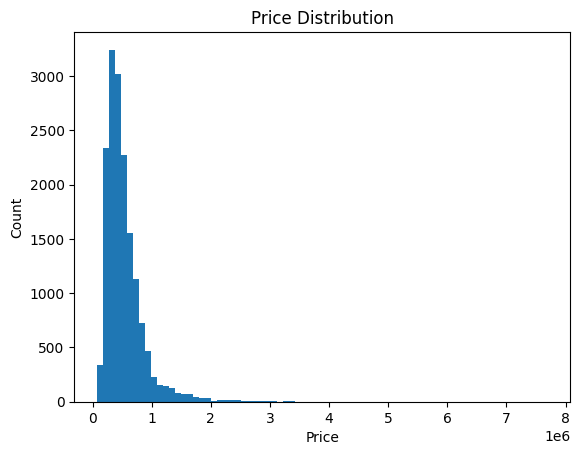

In [19]:
plt.hist(df['price'],bins=75)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

#### Right skewed So Log Transform

In [15]:
df['log_price'] = np.log1p(df['price'])

#### Log Price plot

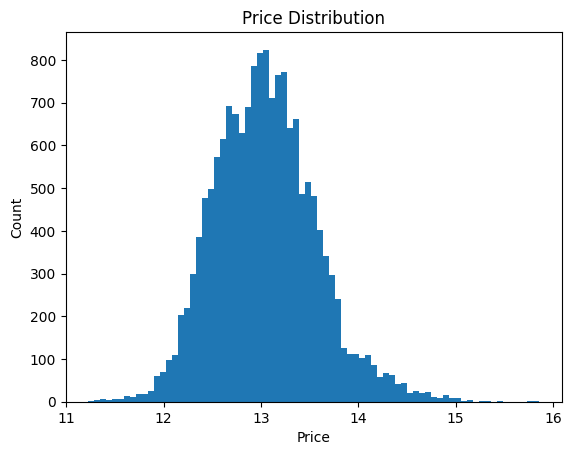

In [21]:
plt.hist(df['log_price'],bins=75)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

### 2. Sqft_living

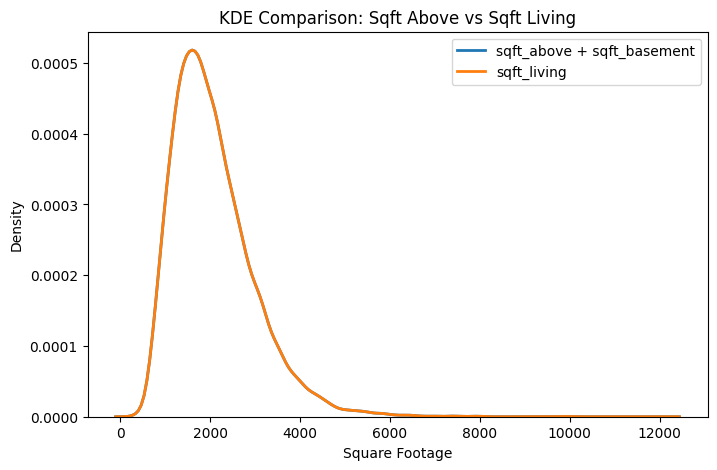

In [22]:
plt.figure(figsize=(8,5))

sns.kdeplot(df["sqft_above"] + df["sqft_basement"],label="sqft_above + sqft_basement",linewidth=2)
sns.kdeplot(df["sqft_living"], label="sqft_living", linewidth=2)

plt.xlabel("Square Footage")
plt.ylabel("Density")
plt.title("KDE Comparison: Sqft Above vs Sqft Living")
plt.legend()
plt.show()

#### So we drop sqft_living

In [16]:
df=df.drop(['sqft_living'],axis=1)
df_val=df_val.drop(['sqft_living'],axis=1)

### 3. Bedrooms

In [32]:
df['bedrooms'].value_counts()

bedrooms
3     7380
4     5128
2     2098
5     1213
6      197
1      142
7       26
8        9
0        8
9        5
10       2
Name: count, dtype: int64

#### no. of Bedrooms=33 is not feasible so We can take that as false data so drop it

In [17]:
df = df[df['bedrooms'] != 33]

<Axes: xlabel='bedrooms', ylabel='Count'>

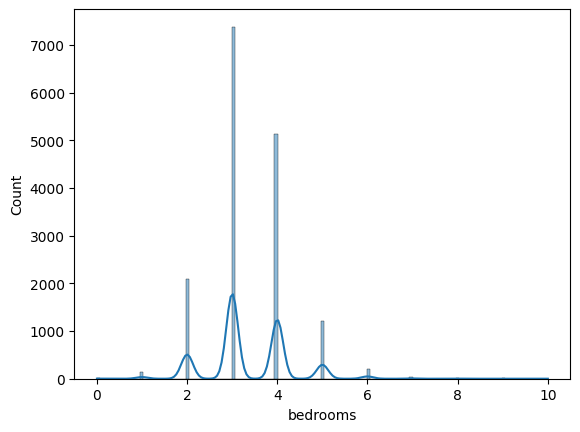

In [26]:
sns.histplot(df['bedrooms'],kde=True)

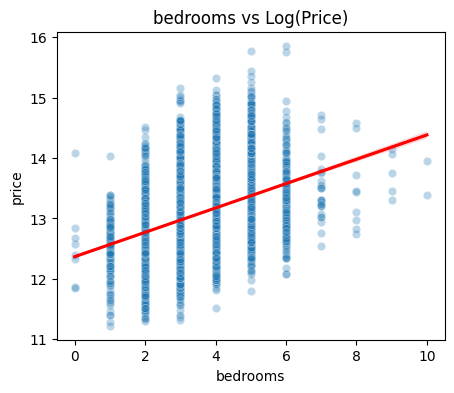

In [51]:
plt.figure(figsize=(5,4))
sns.scatterplot(
        x=df['bedrooms'],
        y=np.log1p(df['price']),
        alpha=0.3
    )
sns.regplot(
        x=df['bedrooms'],
        y=np.log1p(df['price']),
        scatter=False,
        color='red'
    )
plt.title("bedrooms vs Log(Price)")
plt.show()

### 4. Bathrooms

<Axes: xlabel='bathrooms', ylabel='Count'>

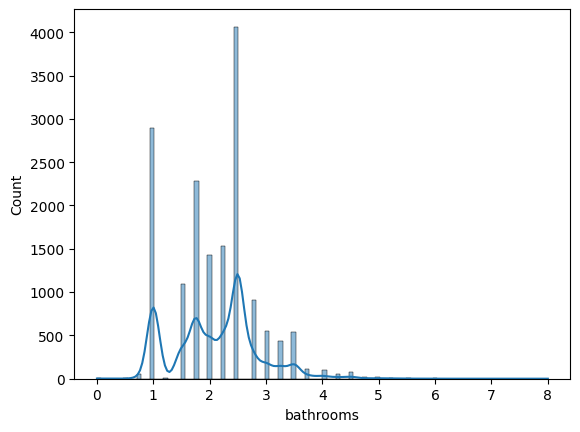

In [27]:
sns.histplot(df['bathrooms'],kde=True)

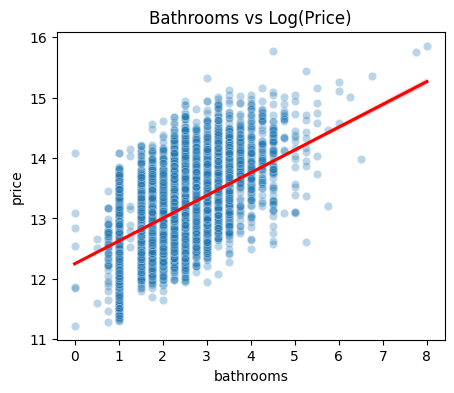

In [50]:
plt.figure(figsize=(5,4))
sns.scatterplot(
        x=df['bathrooms'],
        y=np.log1p(df['price']),
        alpha=0.3
    )
sns.regplot(
        x=df['bathrooms'],
        y=np.log1p(df['price']),
        scatter=False,
        color='red'
    )
plt.title("Bathrooms vs Log(Price)")
plt.show()

### 5. Floors

<Axes: xlabel='floors', ylabel='Count'>

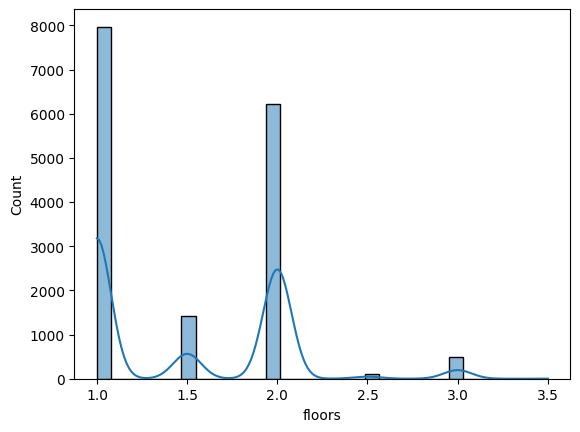

In [28]:
sns.histplot(df['floors'],kde=True)


### 6. Waterfront

In [29]:
df['waterfront'].value_counts()

waterfront
0    16095
1      113
Name: count, dtype: int64

In [18]:
df['waterfront']=df['waterfront']>0
df_val['waterfront']=df_val['waterfront']>0

## Bivariate analysis

### 1. geospatial price heatmap

Text(0, 0.5, 'Latitude')

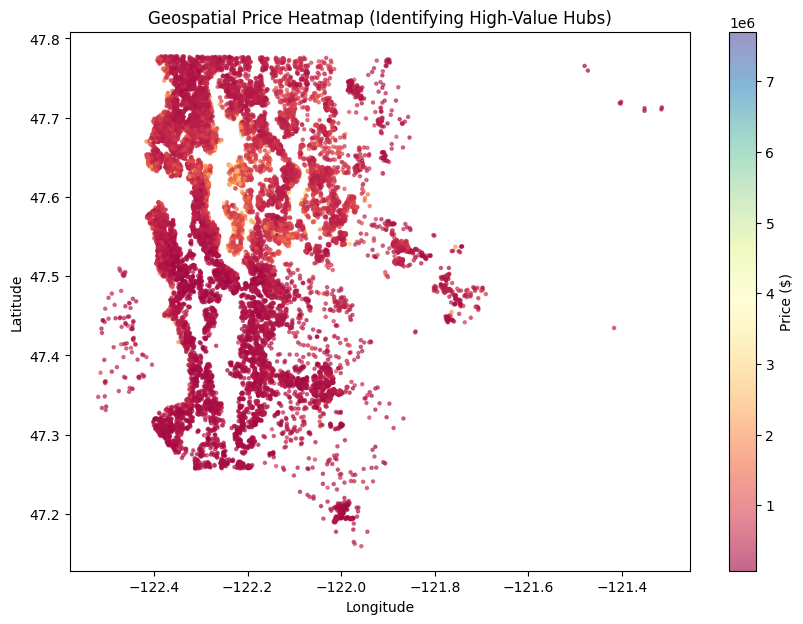

In [31]:
plt.figure(figsize=(10, 7))
plt.scatter(df['long'], df['lat'], c=df['price'], cmap='Spectral', s=5, alpha=0.6)
plt.colorbar(label='Price ($)')
plt.title('Geospatial Price Heatmap (Identifying High-Value Hubs)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

### 2. Grade vs Price

<Axes: xlabel='grade', ylabel='price'>

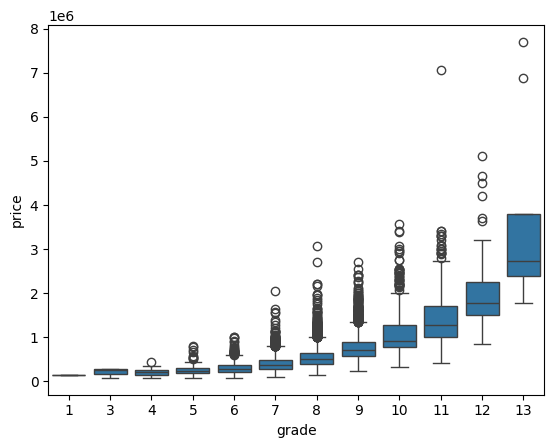

In [32]:
sns.boxplot(x='grade', y='price', data=df)

### 3. Waterfront vs Price

<Axes: xlabel='waterfront', ylabel='price'>

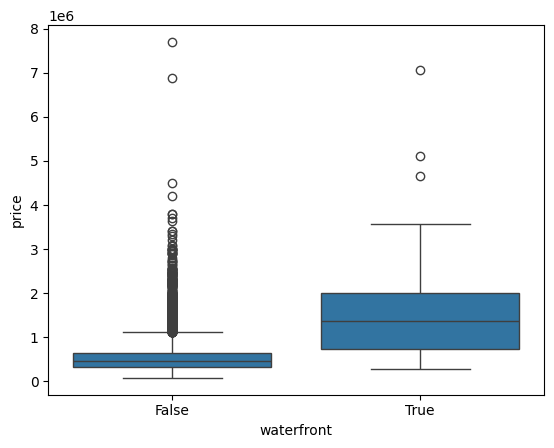

In [33]:
sns.boxplot(x='waterfront', y='price', data=df)

### 4. View vs Price

<Axes: xlabel='view', ylabel='price'>

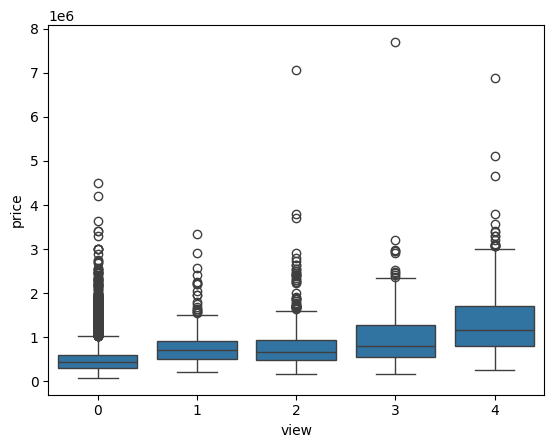

In [34]:
sns.boxplot(x='view', y='price', data=df)

#### Create Features Like house_age from date to sale_year

In [19]:
df['date'] = pd.to_datetime(df['date'])
df['sale_year'] = df['date'].dt.year

In [20]:
df_val['date'] = pd.to_datetime(df_val['date'])
df_val['sale_year'] = df_val['date'].dt.year

In [21]:
df['house_age'] = df['sale_year'] - df['yr_built']
df['house_age'] = df['house_age'].apply(lambda x: max(x, 0))

df['is_renovated']=df['yr_renovated']>0

In [22]:
df_val['house_age'] = df_val['sale_year'] - df_val['yr_built']
df_val['house_age'] = df_val['house_age'].apply(lambda x: max(x, 0))

df_val['is_renovated']=df_val['yr_renovated']>0

In [23]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'log_price', 'sale_year', 'house_age',
       'is_renovated'],
      dtype='object')

In [24]:
df_val.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sale_year', 'house_age',
       'is_renovated'],
      dtype='object')

In [25]:
df=df.drop(['date','yr_built','yr_renovated','sale_year'],axis=1)
df_val=df_val.drop(['date','yr_built','yr_renovated','sale_year'],axis=1)

### Correlation matrix

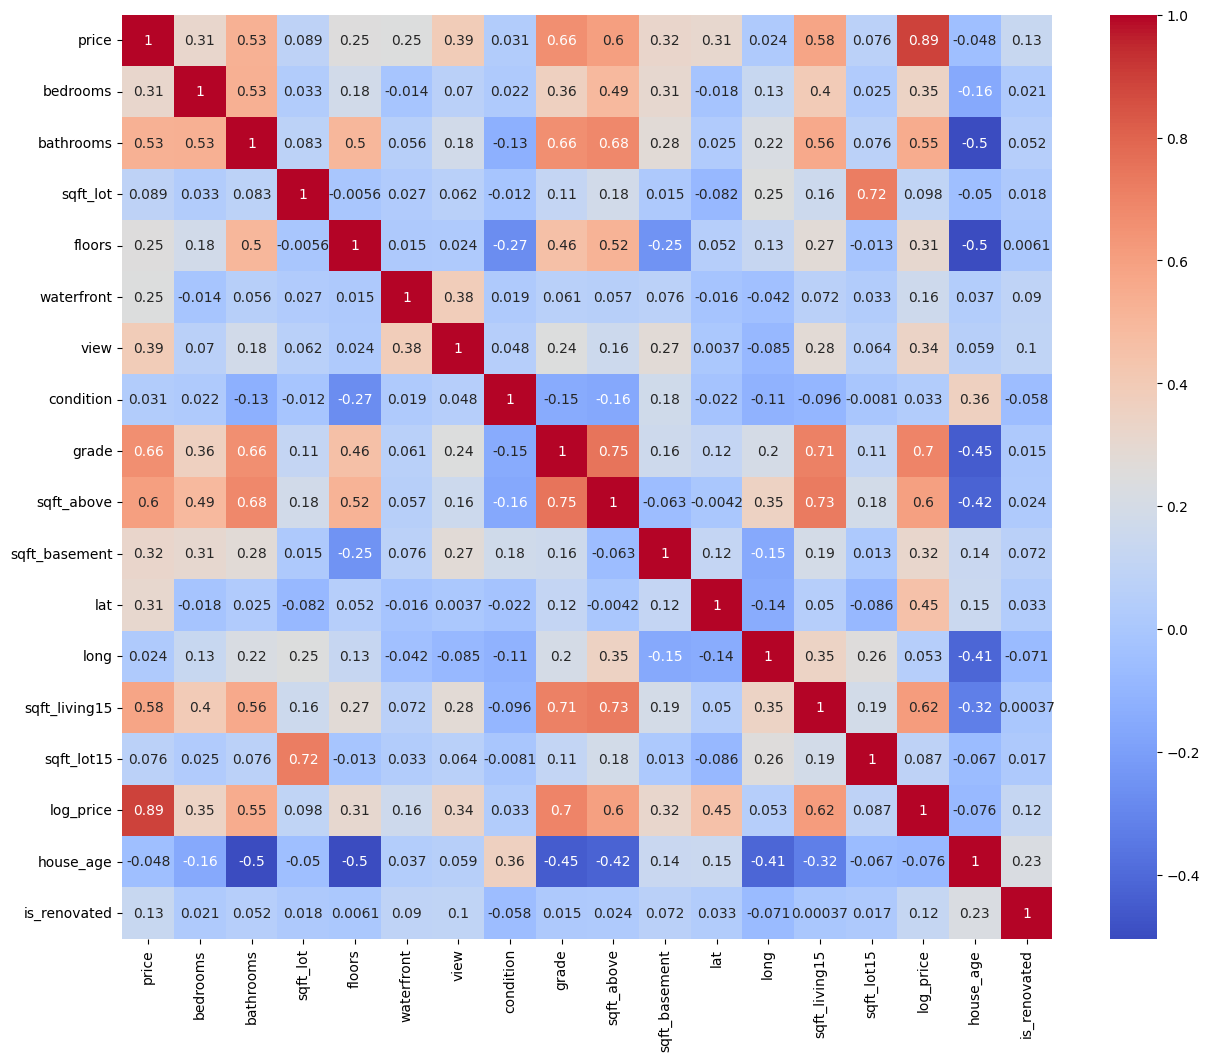

In [39]:
plt.figure(figsize=(15,12))
-corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [26]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'log_price', 'house_age',
       'is_renovated'],
      dtype='object')

In [27]:
df_val.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'house_age', 'is_renovated'],
      dtype='object')

### Tabular data

In [28]:
df.shape

(16208, 18)

In [29]:
df_val.shape

(5404, 17)

In [30]:
df.to_csv('tabular_data.csv')
df_val.to_csv('test.csv')

### visual embeddings from the images

In [72]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image

In [34]:
image_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In [35]:
resnet = models.resnet18(pretrained=True)

# Remove final classification layer
resnet.fc = nn.Identity()

resnet.eval()  # inference mode


C:\Users\mahip\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\mahip\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [68]:
def extract_image_feature(image_path):
    image = Image.open(image_path).convert("RGB")
    image = image_transform(image).unsqueeze(0)  # add batch dim

    with torch.no_grad():
        features = resnet(image)

    return features.squeeze().numpy()  # shape: (512,)


In [44]:
image_features = []

for img_name in sorted(os.listdir("images")):
    path = os.path.join("images", img_name)
    feature = extract_image_feature(path)
    image_features.append(feature)

image_features = np.array(image_features)


In [45]:
image_features.shape

(16208, 512)

In [39]:
image_features_val = []

for img_name in sorted(os.listdir("images_val")):
    path = os.path.join("images_val", img_name)
    feature = extract_image_feature(path)
    image_features_val.append(feature)

image_features_val = np.array(image_features_val)


In [40]:
image_features_val.shape

(5404, 512)

In [46]:
image_features=pd.DataFrame(image_features)
image_features.to_csv('image_data.csv')

In [41]:
image_features_val=pd.DataFrame(image_features_val)
image_features_val.to_csv('image_data_val.csv')

## GRAD-CAM 

In [71]:
import cv2

In [60]:
resnet = models.resnet18(pretrained=True)

# Remove classifier (same as your code)
resnet.fc = nn.Identity()

# IMPORTANT: gradients required
resnet.train()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [61]:
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

def load_image(img_path):
    img = Image.open(img_path).convert("RGB")
    tensor = image_transform(img).unsqueeze(0)
    return img, tensor


In [62]:
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self._register_hooks()

    def _register_hooks(self):
        def forward_hook(module, input, output):
            self.activations = output

        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0]

        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_backward_hook(backward_hook)

    def generate_cam(self, input_tensor):
        self.model.zero_grad()

        # Forward pass
        features = self.model(input_tensor)

        # Dummy scalar loss (important!)
        loss = features.mean()
        loss.backward()

        # Compute CAM
        weights = self.gradients.mean(dim=(2, 3), keepdim=True)
        cam = (weights * self.activations).sum(dim=1)
        cam = torch.relu(cam)

        cam = cam.squeeze().detach().cpu().numpy()
        cam = cv2.resize(cam, (224, 224))
        cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)

        return cam


In [63]:
target_layer = resnet.layer4
gradcam = GradCAM(resnet, target_layer)


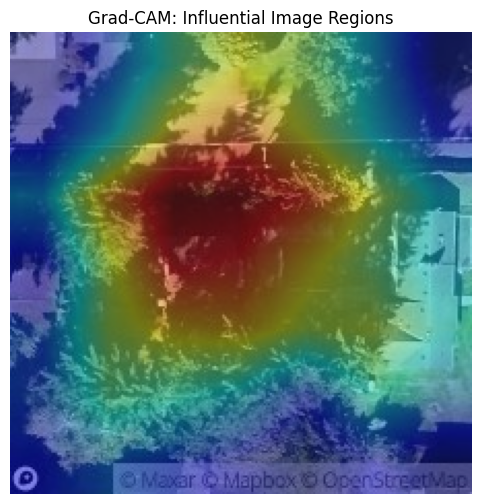

In [65]:
def overlay_cam(image, cam):
    image = np.array(image)
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    overlay = 0.6 * image + 0.4 * heatmap
    overlay = np.clip(overlay, 0, 255).astype(np.uint8)
    return overlay

overlay_img = overlay_cam(orig_img, cam)

plt.figure(figsize=(6,6))
plt.imshow(overlay_img)
plt.axis("off")
plt.title("Grad-CAM: Influential Image Regions")
plt.show()


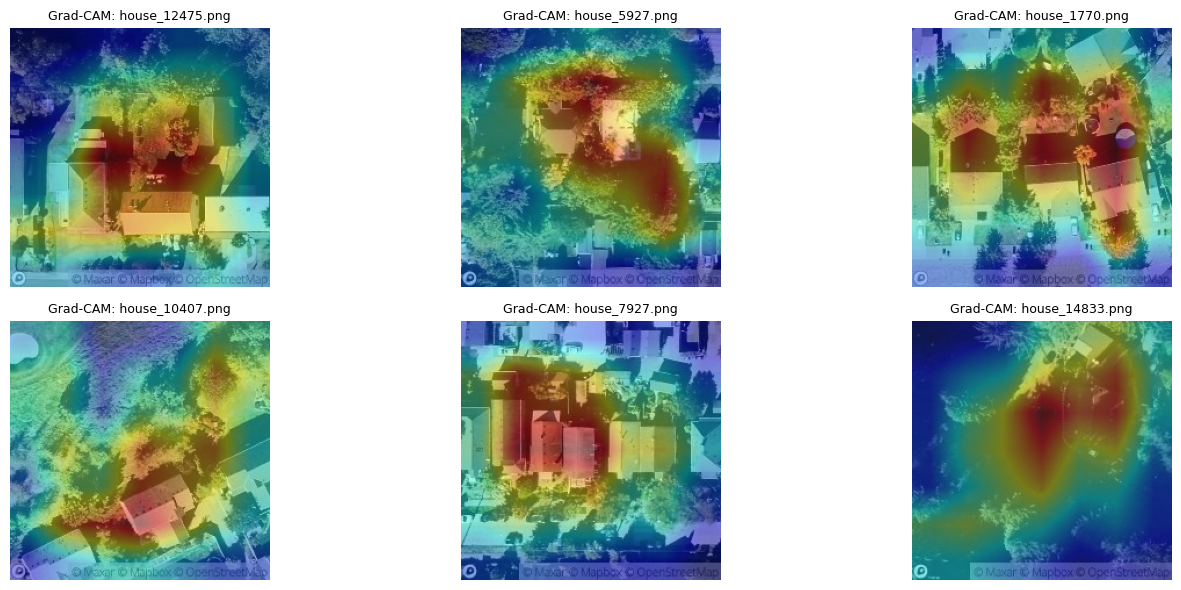

In [73]:
import os
import random
import matplotlib.pyplot as plt

# Path to satellite images directory
IMAGE_DIR = "images"

# Get all image files
all_images = [
    f for f in os.listdir(IMAGE_DIR)
    if f.lower().endswith((".png"))
]

# Randomly select 5 images
selected_images = random.sample(all_images, 6)

plt.figure(figsize=(15, 6))

for idx, img_name in enumerate(selected_images):
    img_path = os.path.join(IMAGE_DIR, img_name)

    # Load image
    orig_img, input_tensor = load_image(img_path)

    # Generate Grad-CAM
    cam = gradcam.generate_cam(input_tensor)

    # Overlay heatmap
    overlay_img = overlay_cam(orig_img, cam)

    # Plot
    plt.subplot(2, 3, idx + 1)
    plt.imshow(overlay_img)
    plt.title(f"Grad-CAM: {img_name}", fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()
